<a href="https://colab.research.google.com/github/hihiririri/FIT-Reasearch-Connect/blob/main/Copy_of_Exercise_4_8_Building_your_own_digit_recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 4.8 Building your own digit recognition model

Now, you are going to apply your knowledge to a new model and different dataset.

This is the MNIST dataset, which contains images of handwritten digits. Each image is composed of a 28 pixel by 28 pixel grid, each pixel in an image has gray-scale value. So, 0 would be as light as possible, and 255 is as dark as possible.

For each image, the 28 x 28 grid has been flattened into a 784 x 1 array, showing a digit like 0, 1, 2, 3 4, all the way up to 9. You can download the dataset from the following link:

[mnist.csv](https://drive.google.com/file/d/1Z2N5ad_hsdguG64ta76O8iTKiBnPwxZK/view?usp=sharing)

You will create a deep learning model taking in those 784 features for each image as inputs, and predicting digits from among 10 possible values for the output.

The data is pre-loaded into a pandas DataFrame called `df`. The dataframe has 2000 rows, we will divide `df` into two parts. The first 1900 rows are used to create the `predictors` for training the model. Other 100 rows are used to create the `pred_data` for making predictions with the model.

The `predictors`, `target`, and `pred_data` arrays are also pre-defined.

We also define an utility function named `showImg()` to show images from the dataset with the corresponding labels.


## Instructions

* Create a model that has two hidden layers of `50` units. The input_shape for this dataset is `(784,)`. The activation function of the hidden layers are `'relu'`.
* The output layer should use `'softmax'` activation function, and the number of nodes in this layer should be the same as the number of possible outputs, in this case: `10`.
* Compile model as you have done with previous exercise: Using `'adam'` as the optimizer, `'categorical_crossentropy'` for the loss, and `metrics=['accuracy']`.
* Fit the model using `predictors` and `target`, using a `validation_split` of `0.3`. The number of epochs is `20`, using early stopping with `patience=5`.
* After finish fitting the model, you should save the model with `model.save()` function.
* Load the saved model with `load_model()` function, then use the loaded model to predict on `pred_data`.

## Code

Load data and convert the data to NumPy array:

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

# Load csv file into the dataframe: df
df = pd.read_csv("mnist.csv")

# The dataframe df has 2000 rows, we will divide df into two parts
# The first 1900 rows are used to create the predictors for training the model
# Other 100 rows are used to create the pred_data for making predictions with the model
trainDF = df.iloc[:1900,:]
predictDF = df.iloc[1900:,:]
print(f"The shape of: df = {df.shape}, trainDF = {trainDF.shape}, predictDF = {predictDF.shape}")

# Create predictors NumPy array: predictors
predictors = trainDF.drop(['5'], axis=1).values

# Create list of image labels
label = trainDF['5'].values

# Convert the target to categorical: target
target = to_categorical(trainDF['5'])

# Create data for predictions NumPy array: pred_data
pred_data = predictDF.drop(['5'], axis=1).values

print(f"The shape of: predictors = {predictors.shape}, target = {target.shape}, pred_data = {pred_data.shape}")

# Define the input shape: input_shape
n_cols = predictors.shape[1]
input_shape = (n_cols,)


The shape of: df = (2000, 785), trainDF = (1900, 785), predictDF = (100, 785)
The shape of: predictors = (1900, 784), target = (1900, 10), pred_data = (100, 784)


Define utility functions

<Figure size 640x480 with 0 Axes>

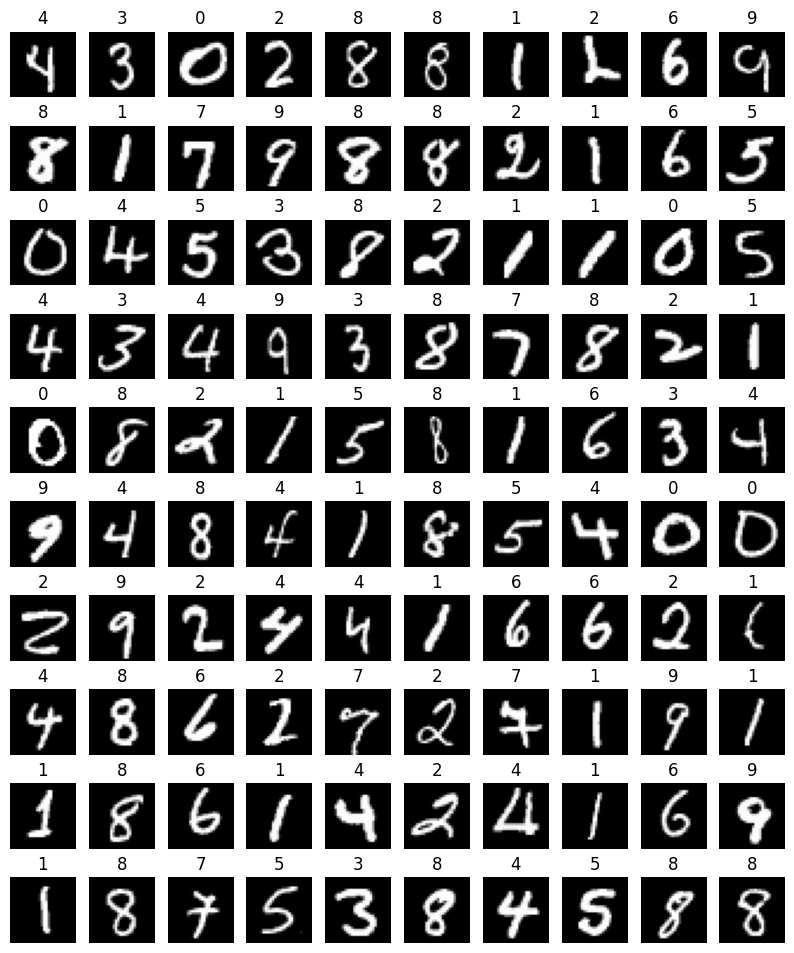

In [2]:
import matplotlib.pyplot as plt
plt.gray()

# Function showImage display images in a grid of nRow x nColumn
# Image data comes from the data array, starting from startIndex
# label array contains the corresponding lable of the image
def showImage(nRow, nColumn, startIndex, data, label):
#  imgData =[]
  # create figure
  fig = plt.figure(figsize=(nColumn, nRow*1.2))

  # reading images
  for i in range(0, nRow*nColumn):
    row = data[startIndex + i]
    title = label[startIndex + i]
    imgData = row.reshape([28,28])

    # Adds a subplot at the i+1 position
    fig.add_subplot(nRow, nColumn, i+1)
    plt.imshow(imgData)
    plt.axis('off')
    plt.title(title)

  plt.show()

# Show 100 images in the predictors array, starting from #0
showImage(10, 10, 0, predictors, label)


Create a neural network for the classification task

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define a function to create model:
def get_new_model(input_shape):
  # Set up the model
  model = Sequential()
  model.add(Dense(50, activation='relu', input_shape=input_shape))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model


Compile and fit the model with a validation dataset:

In [4]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Specify, compile and fit the model
model = get_new_model(input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=5)
model_training = model.fit(predictors, target, epochs=20, validation_split=0.3, callbacks=[early_stopping_monitor])

# Save the model - creates a zip archive myModel.keras.
model.save('myModel.keras')

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3321 - loss: 29.4237 - val_accuracy: 0.5912 - val_loss: 7.0331
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6841 - loss: 4.3713 - val_accuracy: 0.6421 - val_loss: 4.6069
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7825 - loss: 2.0074 - val_accuracy: 0.6667 - val_loss: 3.9411
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8553 - loss: 0.9415 - val_accuracy: 0.7035 - val_loss: 3.3439
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8792 - loss: 0.7652 - val_accuracy: 0.7018 - val_loss: 3.5482
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8737 - loss: 0.7173 - val_accuracy: 0.7263 - val_loss: 3.1913
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8965 - loss: 0.5258 - val_accuracy: 0.7351 - val_loss: 3.0256
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9516 - loss: 0.2011 - val_accuracy: 0.7439 - val_loss: 3.0564
E

Load the saved model and make predictions on the `pred_data`

In [5]:
# Import load_model
from tensorflow.keras.models import load_model

myModel = load_model('myModel.keras')
predictions = myModel.predict(pred_data)
prediction_classes = np.argmax(predictions,axis=1)
print(prediction_classes)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[8 2 8 4 5 7 0 4 1 8 8 9 4 5 3 7 1 9 2 5 2 5 4 4 6 0 1 9 1 9 4 2 7 5 1 6 0
 9 0 7 7 1 1 9 2 5 8 1 8 9 9 6 5 2 6 4 2 6 4 6 4 7 7 8 0 7 5 8 8 5 4 4 1 5
 7 9 7 0 4 7 8 1 3 0 0 7 9 1 2 4 4 9 0 0 9 3 2 5 9 9]


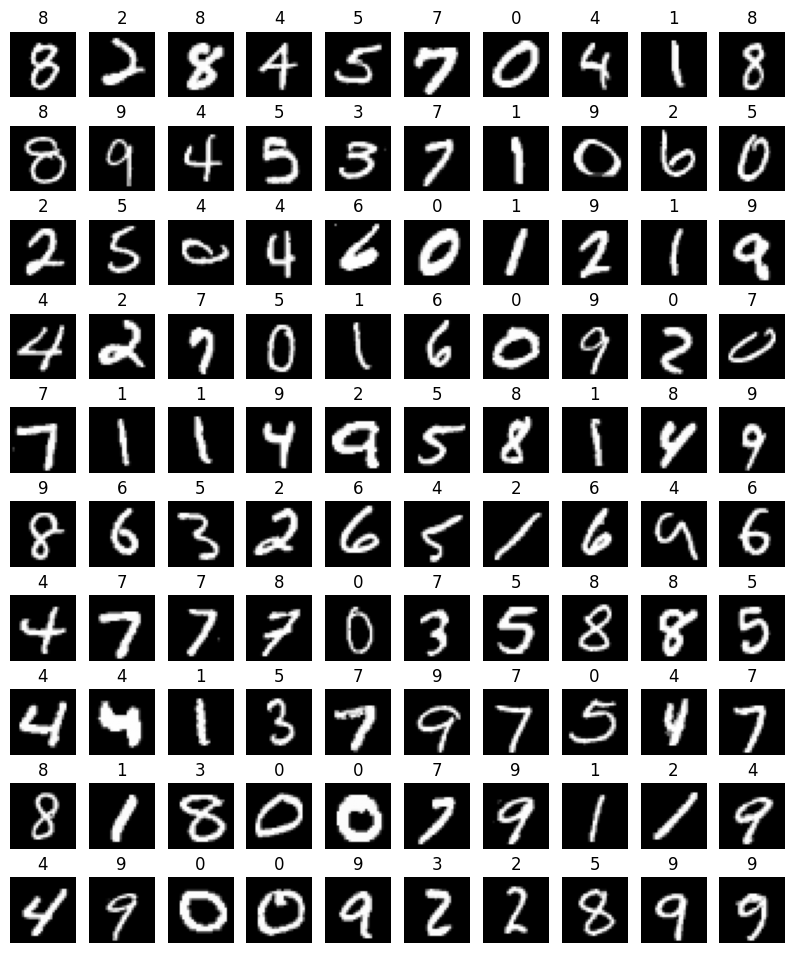

In [6]:
# Show 100 images in the pred_data array with prediction result, starting from #0
showImage(10, 10, 0, pred_data, prediction_classes)

# Question
The current model has the `val_accuracy` around `0.77`. Please improve the model to get the `val_accuracy` more than `0.8`.
Use the new model to predict on the `pred_data` and compare the results.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# =======================
# Load Data
# =======================
df = pd.read_csv("mnist.csv")

trainDF = df.iloc[:1900, :]
predictDF = df.iloc[1900:, :]

predictors = trainDF.drop(['5'], axis=1).values
label = trainDF['5'].values
target = to_categorical(trainDF['5'])

pred_data = predictDF.drop(['5'], axis=1).values

n_cols = predictors.shape[1]
input_shape = (n_cols,)

# =======================
# Improved Model
# =======================
def get_better_model(input_shape):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(10, activation='softmax'))
    return model

model = get_better_model(input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# =======================
# Train Model
# =======================
early_stopping_monitor = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    predictors, target,
    epochs=30,
    validation_split=0.3,
    callbacks=[early_stopping_monitor],
    batch_size=64,
    verbose=1
)

# =======================
# Save + Load Model
# =======================
model.save('myBetterModel.keras')
myBetterModel = load_model('myBetterModel.keras')

# =======================
# Predictions
# =======================
predictions = myBetterModel.predict(pred_data)
prediction_classes = np.argmax(predictions, axis=1)

print("Predicted Classes for pred_data:\n", prediction_classes)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.3691 - loss: 2.0014 - val_accuracy: 0.7298 - val_loss: 1.1816
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8109 - loss: 0.6100 - val_accuracy: 0.8175 - val_loss: 0.6068
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8860 - loss: 0.3868 - val_accuracy: 0.8246 - val_loss: 0.5757
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9088 - loss: 0.3260 - val_accuracy: 0.8719 - val_loss: 0.3882
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9201 - loss: 0.2512 - val_accuracy: 0.8789 - val_loss: 0.3874
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9458 - loss: 0.1870 - val_accuracy: 0.8912 - val_loss: 0.3485
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9612 - loss: 0.1489 - val_accuracy: 0.8965 - val_loss: 0.3455
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9637 - loss: 0.1366 - val_accuracy: 0.9053 - v

In [ ]:
from google.colab import drive
drive.mount('/content/drive')